## MATH 6388: Statistical and Machine Learning

### Lecture 6: Clustering Techniques

### Instructor: Farhad Pourkamali 

#### Department of Mathematical and Statistical Sciences
#### University of Colorado Denver


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388/blob/main/Lecture6_Clustering.ipynb)



### Motivation
<hr style="border:2px solid gray">

* The vast majority of available data is unlabeled, i.e., we have the input features $\mathbf{x}_n$ but not the labels $y_n$ 
    * Thus, we have access to data sets in the form of $\mathcal{D}=\{\mathbf{x}_n\}_{n=1}^N$
* For example: Diagnosing skin cancer from lesion images
    * Long, costly, and tedious task to label each sample as “cancerous” or “non-cancerous”

<center><img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/lesion.png?raw=true" width=1200 height=1000><center>

### Clustering: identifying similar groups of data
<hr style="border:2px solid gray">

* There is no universal definition of what a cluster is
    * It depends on the context and different algorithms will capture different kinds of clusters 
    * A common approach is to look for instances centered around a particular point, called centroid 
   
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/cluster.png?raw=true" width=300 height=200>

* We will discuss the following topics
    * K-means clustering and its limitations 
    * Spectral clustering and DBSCAN
    * Evaluation metrics

### K-means clustering
<hr style="border:2px solid gray">

* Assume we have $K$ cluster centers $\boldsymbol{\mu}_k, k=1,\ldots,K,$ in $\mathbb{R}^D$, so we can cluster the data by assigning each sample $\mathbf{x}_n$ to its closest center

$$z_n^*=\underset{k\in\{1,\ldots,K\}}{\mathrm{argmin}} \|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$

* But, we don't know the cluster centers, so we should minimize the following loss/cost function

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* $\mathbf{X}\in\mathbb{R}^{N\times D}$ (data matrix), $\mathbf{Z}\in[0,1]^{N\times K}$ (membership matrix), and $\mathbf{M}\in\mathbb{R}^{K\times D}$ (matrix of cluster centers)
* Frobenius norm: $\|\mathbf{A}\|_F^2= \sum_{i}\sum_{j} a_{ij}^2$

### K-means clustering
<hr style="border:2px solid gray">

* Start by placing the centers randomly (pick $K$ instances at random)
* Iterate over the following two steps 
    * Assign each instance to the cluster whose center is closest 
    * Update each cluster center by computing the mean of instances in that cluster

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/kmeans.png?raw=true" width=600 height=400>

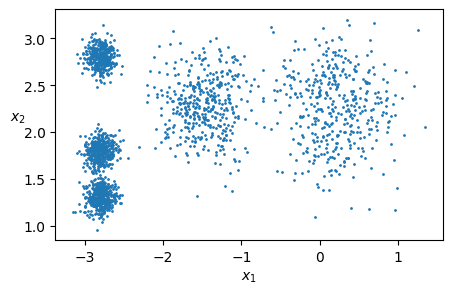

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# centers
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7) 

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


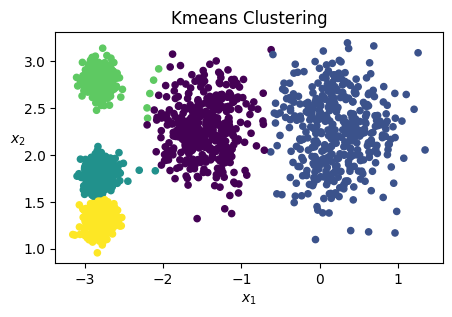

In [11]:
# Apply K-means clustering to this data set 
kmeans = KMeans(n_clusters=5, random_state=2)

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

In [12]:
# find cluster centers
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

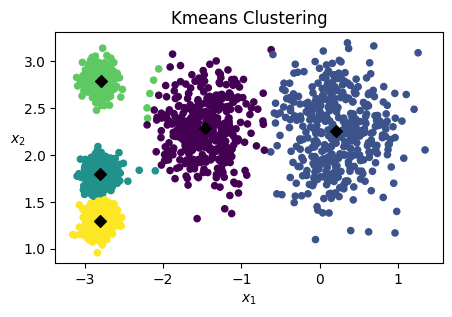

In [13]:
plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', marker='D')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

In [14]:
# We can predict the labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

### K-means clustering and initialization
<hr style="border:2px solid gray">

* K-means clustering needs to be initialized carefully

* Therefore, we can use multiple restarts, i.e., we run the algorithm multiple times from different random starting points, and then pick the best solution
    * Use the "n_init" argument
    * But, we can use better initialization techniques




* Pick the centers sequentially so as to “cover” the data
* Each point is picked with probability proportional to its squared distance to its cluster center
* Thus, at each iteration $t$, we get 

$$p(\boldsymbol{\mu}_t=\mathbf{x}_n)=\frac{D_{t-1}(\mathbf{x}_n)}{\sum_{n'} D_{t-1}(\mathbf{x}_{n'})}$$

where 

$$D_{t-1}(\mathbf{x}_n)=\min_{k\in\{1,\ldots,t-1\}}\|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$


### Finding the optimal number of clusters 
<hr style="border:2px solid gray">

* A natural choice for picking $K$ is to pick the value that minimizes the reconstruction error

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* This is known as the inertia or within-cluster sum-of-squares criterion
* This idea wouldn't work because the inertia monotonically decreases with $K$
* However, we can plot the inertia as a function of $K$ and find the elbow

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/an

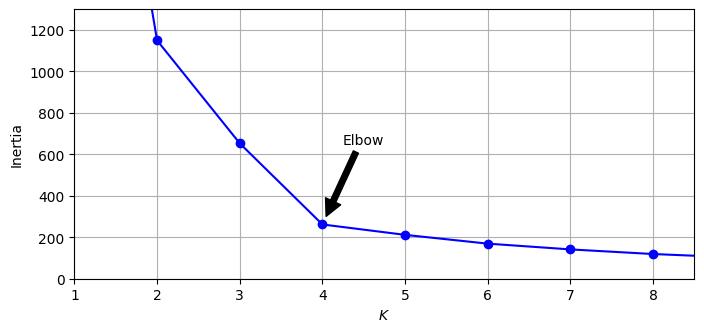

In [15]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$K$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


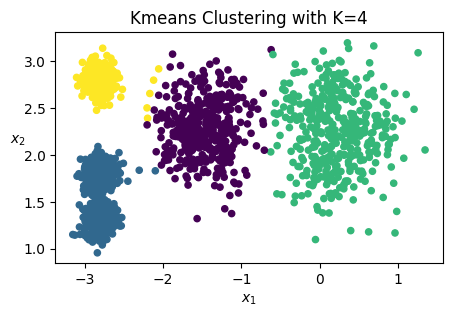

In [16]:
# solve the problem with K=4

kmeans = KMeans(n_clusters=4, random_state=42)

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering with K=4')
plt.show()

### Using silhouette score instead of inertia
<hr style="border:2px solid gray">

* For each sample, find 
    * the mean intra-cluster distance $a$
    * the mean nearest-cluster distance $b$
* Then, we compute the coefficient as follows 

$$\frac{b-a}{\max(a,b)}$$
    
* Finally, we can find the average over all samples 

* The best value is 1, the worst value is -1, and values near 0 indicate overlapping clusters 

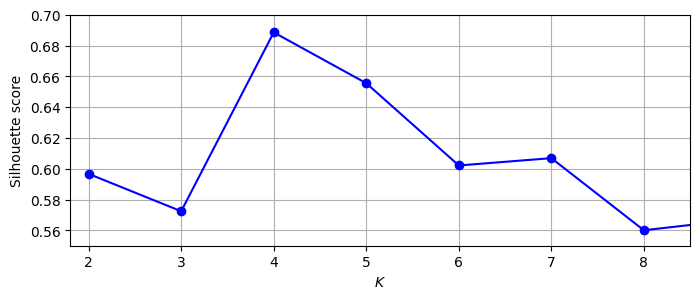

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$K$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

### Limitations of K-means 
<hr style="border:2px solid gray">

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/limitation.png?raw=true" width=800 height=600>

### Spectral clustering
<hr style="border:2px solid gray">

* Data points as nodes of a connected graph 

* Form an undirected graph with the weight matrix $\mathbf{W}$, where the strength of the edge between $\mathbf{x}_i$ and $\mathbf{x}_j$ is a measure of similarity

* Thus, the goal is to find a graph partition into $S_1,\ldots,S_K$ disjoint sets of nodes so as to minimize some kind of cost

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/graph2.png?raw=true" width=200 height=300>

### What is the cost?
<hr style="border:2px solid gray">

* Given the weight matrix $\mathbf{W}$, normalized cut (Ncut) is defined as

$$\text{Ncut}(S_1,\ldots,S_K)=\frac{1}{2}\sum_{k=1}^K \frac{w(S_k,\bar{S}_k)}{\text{vol}(S_k)}$$

where 

$$w(A,B)=\sum_{i\in A}\sum_{j \in B} w_{ij},\; \bar{S}_k = V\setminus S_k$$

and 

$$\text{vol}(A)=\sum_{i\in A}d_i, \; d_i=\sum_{j=1}^N w_{ij} \;\text{(degree of node i)}$$

### Continuous relaxation of the problem
<hr style="border:2px solid gray">

* Form the graph Laplacian matrix ($\mathbf{D}$ is the diagonal degree matrix)

$$ \mathbf{L} = \mathbf{D} - \mathbf{W} $$

* Normalize the graph Laplacian

$$ \mathbf{L}_{n} = \mathbf{D}^{-1/2}\big(\mathbf{D} - \mathbf{W}\big) \mathbf{D}^{-1/2}=\mathbf{I}- \mathbf{D}^{-1/2}\mathbf{W}\mathbf{D}^{-1/2}$$

* Find the smallest $K$ eigenvectors of $\mathbf{L}_{n}$, stack them into the matrix $\mathbf{U}\in\mathbb{R}^{N\times K}$, normalize each row to unit norm, and then apply K-means clustering to the rows of $\mathbf{U}$

* More information about spectral clustering: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264745

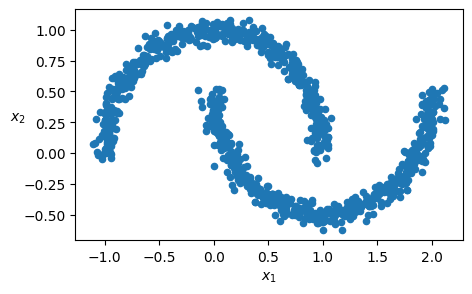

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


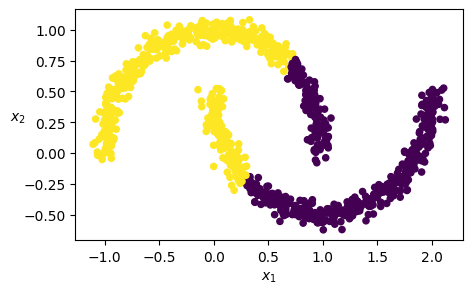

In [2]:
from sklearn.cluster import KMeans 

km = KMeans(n_clusters=2,  random_state=42)
km.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

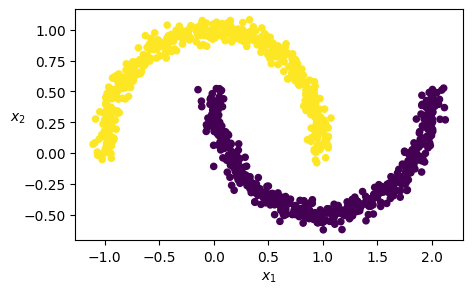

In [3]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2, gamma=100, random_state=42) # 2, 10, 100, 10000
sc.fit(X)

# what is the role of gamma: np.exp(-gamma * d(X,X) ** 2)

plt.scatter(X[:, 0], X[:, 1], c=sc.labels_, s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

### Autoencoders and clustering
<hr style="border:2px solid gray">

* Autoencoders are a type of neural network architecture designed for unsupervised learning

    * They consist of an encoder and a decoder, with the goal of learning a compact representation (latent space) of the input data
    
    * The encoder compresses the input data into a lower-dimensional representation, and the decoder reconstructs the original data from this representation
    
* Once an autoencoder is trained, the latent space can be used for clustering purposes
    * The assumption is that similar data points in the original space will also have similar representations in the latent space, making them cluster together
    
* Visualization of the latent space using techniques like scatter plots or t-SNE (t-distributed Stochastic Neighbor Embedding) can provide insights into the clustering structure

In [4]:
import tensorflow as tf 
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full.astype(np.float32) / 255

X_test = X_test.astype(np.float32) / 255

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print(X_train.shape, X_test.shape, X_valid.shape)

(55000, 28, 28) (10000, 28, 28) (5000, 28, 28)


In [5]:
tf.random.set_seed(42)  

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")                   
history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Metal device set to: Apple M2 Max
Epoch 1/10


2023-11-13 21:03:23.481698: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 14s 8ms/step - loss: 0.0251 - val_loss: 0.0204
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0182 - val_loss: 0.0172
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0165 - val_loss: 0.0161
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 8/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0142 - val_loss: 0.0144
Epoch 9/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 10/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0139

1/1 [==============================] - 0s 50ms/step


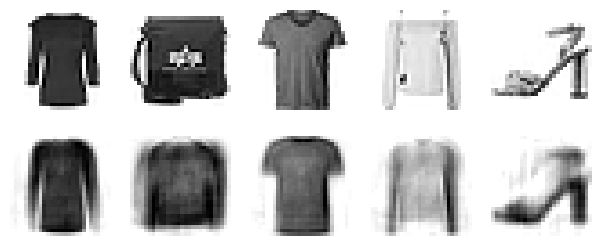

In [6]:
import numpy as np

def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
plt.show()

157/157 [==============================] - 0s 1ms/step


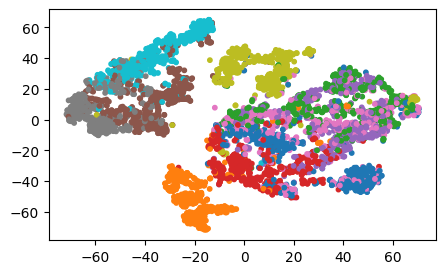

In [7]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)

tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

In [8]:
# convert to a clustering problem with K=2 
from sklearn.cluster import KMeans

y_valid_binary = (y_valid < 5).astype(int)


y_valid_pred = KMeans(n_clusters=2).fit_predict(X_valid_2D)

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
max(np.mean(y_valid_pred == y_valid_binary), np.mean(y_valid_pred != y_valid_binary))

0.856

### DBSCAN
<hr style="border:2px solid gray">

* This algorithm defines clusters as `continuous regions of high density`

    * For each instance, it counts how many samples are located within a small distance $\varepsilon$ from it ($\varepsilon$-neighborhood)
    * If an instance has at least "min_samples" samples in its $\varepsilon$-neighborhood, then it is considered a “core instance”
    * All instances in the neighborhood of a core instance belong to the same cluster
    * Any instance that is not a “core instance” and does not have one in its neighborhood is considered an anomaly  

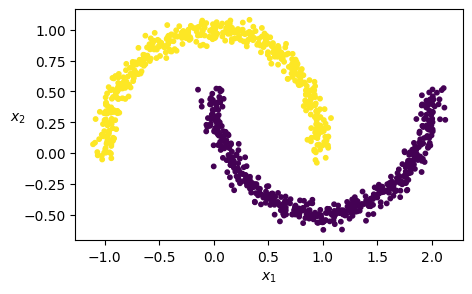

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

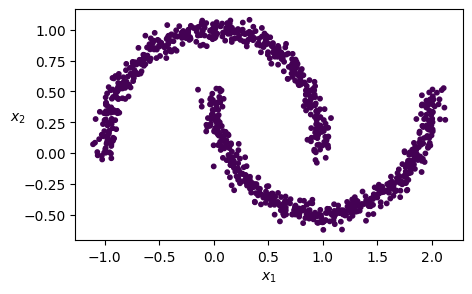

In [28]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

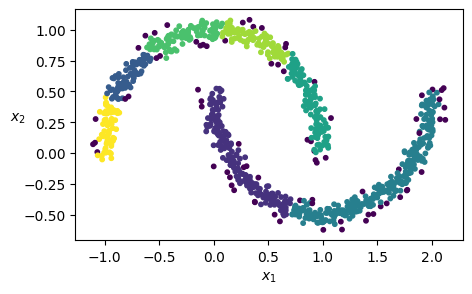

In [29]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [30]:
np.unique(dbscan.labels_) # some instances have a cluster index equal to -1 (anomalies)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [31]:
dbscan.labels_[:20]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4])

### Evaluating clustering performance
<hr style="border:2px solid gray">

* Two main approaches
    * Internal measures (cohesion and separation)
        * Example: Silhouette Coefficient 
    * External measures (compare with ground-truth labels)
        * Mutual information
    
    

### Example 1
<hr style="border:2px solid gray">

<center><img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/example1.png?raw=true" width=900 height=700><center>

### Example 2
<hr style="border:2px solid gray">

<center><img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/example2.png?raw=true" width=900 height=700><center>


### What did we learn?
<hr style="border:2px solid gray">

<center><img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/acc.png?raw=true" width=500 height=300><center>

### Mutual Information based scores
<hr style="border:2px solid gray">

* Given the knowledge of the ground truth class assignments `labels_true` and our clustering algorithm assignments of the same samples `labels_pred`, the mutual Information  measures the agreement of the two assignments

* Assume two label assignments (of the same N objects), $U$ and $V$. Their entropy is the amount of uncertainty for a partition set, defined by:

$$H(U) = - \sum_{i=1}^{|U|}P(i)\log(P(i))$$

where $P(i) = |U_i| / N$ is the probability that an object picked at random from $U$ 
 falls into class $U_i$
 

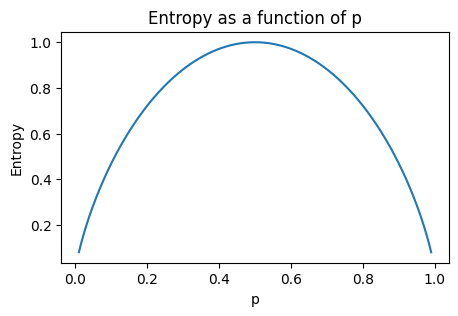

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate entropy
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Generate values for p between 0 and 1
p_values = np.linspace(0.01, 0.99, 1000)

# Calculate entropy for each p
entropy_values = entropy(p_values)

# Plotting
plt.plot(p_values, entropy_values)
plt.title('Entropy as a function of p')
plt.xlabel('p')
plt.ylabel('Entropy')
plt.show()


In [36]:
p_values[np.argmax(entropy_values)].round(2)

0.5

* Likewise for $V$

$$H(V) = - \sum_{j=1}^{|V|}P'(j)\log(P'(j))$$

with $P'(j) = |V_j| / N$

* The mutual information (MI) between $U$ and $V$ is calculated by:

$$\text{MI}(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\log\left(\frac{P(i,j)}{P(i)P'(j)}\right)$$

where $P(i, j) = |U_i \cap V_j| / N$ is the probability that an object picked at random falls into both classes $U_i$ and $V_j$

* The normalized mutual information is defined as

$$\text{NMI}(U, V) = \frac{\text{MI}(U, V)}{\text{mean}(H(U), H(V))}$$

In [38]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print(normalized_mutual_info_score([0, 0, 1, 1], [0, 0, 1, 1]))

print(normalized_mutual_info_score([0, 0, 1, 1], [1, 1, 0, 0]))


1.0
1.0


In [39]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics.cluster import normalized_mutual_info_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Set the number of clusters for KMeans
n_clusters = 3

# Fit KMeans to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the predicted labels
labels = kmeans.labels_

# Evaluate clustering using Mutual Information Score
mi_score = normalized_mutual_info_score(y, labels)

print(f"Mutual Information Score: {mi_score}")


Mutual Information Score: 0.7581756800057785


/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
